<a href="https://colab.research.google.com/github/pkongla478/Human_Stress_Detection_in_and_through_Sleep/blob/main/Human_Stress_Detection_in_and_through_Sleep_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Environment setting up
in this section you will be learning about how the environment is configured to integrate with kaggle API

In [ ]:
# kaggle API configuration
import os

os.environ['KAGGLE_USERNAME'] = 'amornphanturat'
os.environ['KAGGLE_KEY'] = '807dfd9d451dc48aade4cab18144bac5'

In [ ]:
# install kaggle cli
!pip install kaggle -qq
!pip install autoviz -Uq

     |████████████████████████████████| 64 kB 2.0 MB/s 
     |████████████████████████████████| 240 kB 8.8 MB/s 
     |████████████████████████████████| 3.2 MB 56.3 MB/s 
     |████████████████████████████████| 11.2 MB 32.5 MB/s 
     |████████████████████████████████| 12.9 MB 26.3 MB/s 
     |████████████████████████████████| 1.7 MB 44.6 MB/s 
     |████████████████████████████████| 18.5 MB 357 kB/s 
     |████████████████████████████████| 965 kB 53.3 MB/s 
     |████████████████████████████████| 1.6 MB 50.4 MB/s 
     |████████████████████████████████| 121 kB 78.3 MB/s 
     |████████████████████████████████| 82 kB 839 kB/s 


In [ ]:
# download kaggle dataset directly from the commandline
!kaggle datasets download -d laavanya/human-stress-detection-in-and-through-sleep

 69% 2.00M/2.88M [00:00<00:00, 2.84MB/s]
100% 2.88M/2.88M [00:00<00:00, 3.33MB/s]


In [ ]:
# unzipping the dataset
!unzip /content/human-stress-detection-in-and-through-sleep.zip

Archive:  /content/human-stress-detection-in-and-through-sleep.zip
  inflating: IEEE-TCE_2020-08-0175_SaYoPillow.pdf  
  inflating: SaYoPillow.csv          
  inflating: readme.docx             


In [ ]:
# renaming the dataset file
!mv SaYoPillow.csv dataset.csv

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Dataset Understanding 
in this part you will know how to basically visualize the dataset to understand it better

In [ ]:
# reading CSV and store it into our system
dataset = pd.read_csv("dataset.csv")

In [ ]:
dataset.head(10)

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0
5,56.88,19.376,95.376,9.376,94.064,83.44,6.376,58.44,1
6,47.00,16.800,97.200,5.600,95.800,68.00,7.800,52.00,0
7,50.00,18.000,99.000,8.000,97.000,80.00,9.000,55.00,0
8,45.28,16.112,96.168,4.224,95.112,61.12,7.112,50.28,0
9,55.52,19.104,95.104,9.104,93.656,82.76,6.104,57.76,1


In [ ]:
dataset.rename(columns={"sr.1":"sr1"},inplace=True)

In [ ]:
dataset.head(10)

,sr,rr,t,lm,bo,rem,sr1,hr,sl
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0
5,56.88,19.376,95.376,9.376,94.064,83.44,6.376,58.44,1
6,47.00,16.800,97.200,5.600,95.800,68.00,7.800,52.00,0
7,50.00,18.000,99.000,8.000,97.000,80.00,9.000,55.00,0
8,45.28,16.112,96.168,4.224,95.112,61.12,7.112,50.28,0
9,55.52,19.104,95.104,9.104,93.656,82.76,6.104,57.76,1


In [ ]:
sns.countplot (x='sl',data=dataset)

NameError: ignored

In [ ]:
plt.figure(figsize=(9,7))
sns.heatmap(dataset.corr(), annot=True, square=True, fmt='.1f', cbar=False);

NameError: ignored

In [ ]:
#importing Autoviz class
from autoviz.AutoViz_Class import AutoViz_Class

#Instantiate the AutoViz class
AV = AutoViz_Class()

Shape of your Data Set loaded: (630, 9)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
Data cleaning improvement suggestions. Complete them before proceeding to ML modeling.


,Nuniques,dtype,Nulls,Nullpercent,NuniquePercent,Value counts Min,Data cleaning improvement suggestions
sr,627,float64,0,0.000000,99.523810,0,
rr,626,float64,0,0.000000,99.365079,0,
t,626,float64,0,0.000000,99.365079,0,
lm,626,float64,0,0.000000,99.365079,0,
bo,626,float64,0,0.000000,99.365079,0,
rem,626,float64,0,0.000000,99.365079,0,
hr,626,float64,0,0.000000,99.365079,0,
sr.1,501,float64,0,0.000000,79.523810,0,


    8 Predictors classified...
        No variables removed since no ID or low-information variables found in data set

################ Multi_Classification problem #####################
Total Number of Scatter Plots = 36
No categorical or boolean vars in data set. Hence no pivot plots...
No categorical or numeric vars in data set. Hence no bar charts.
All Plots done
Time to run AutoViz = 11 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


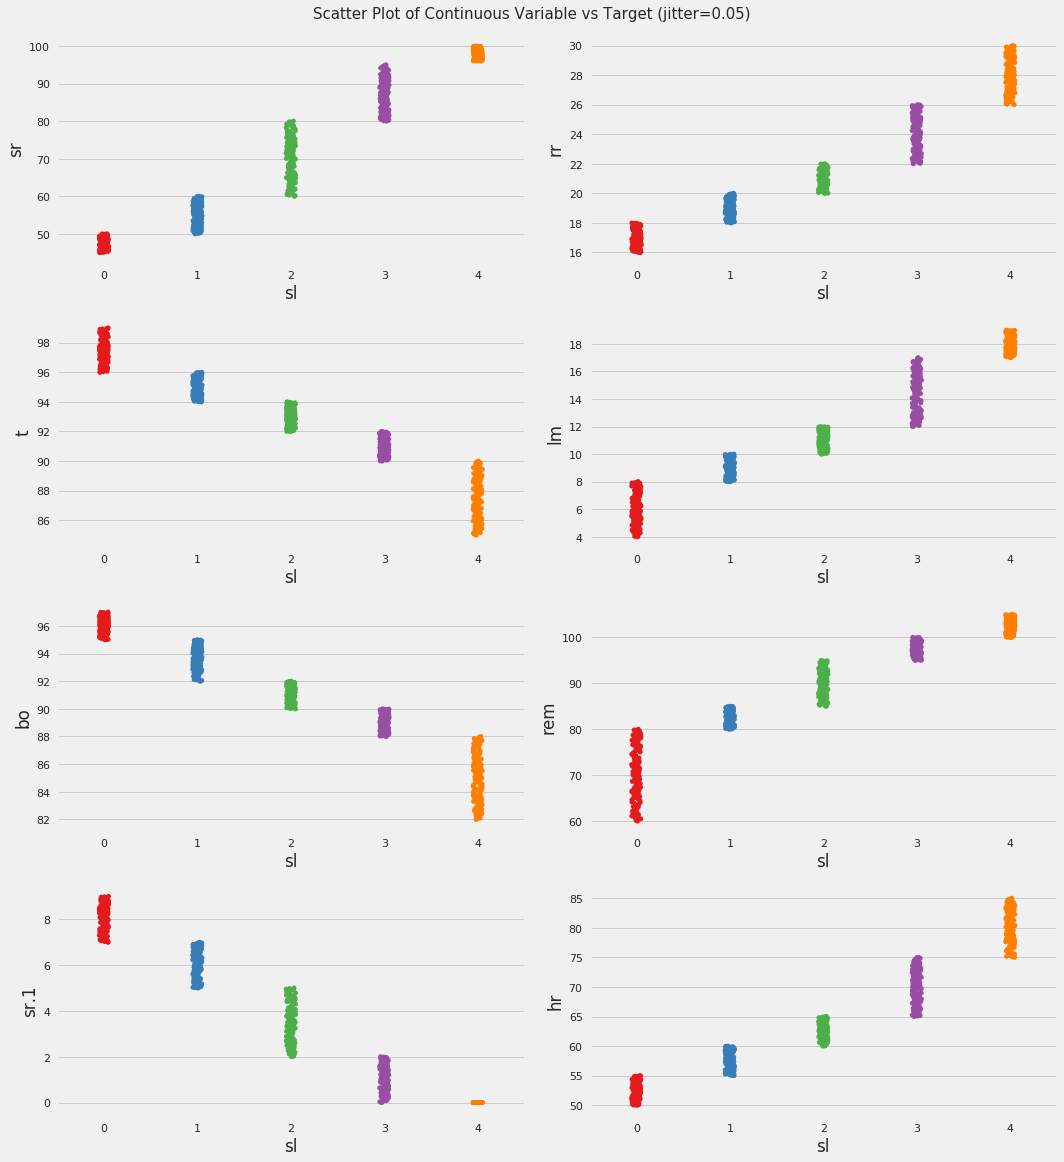

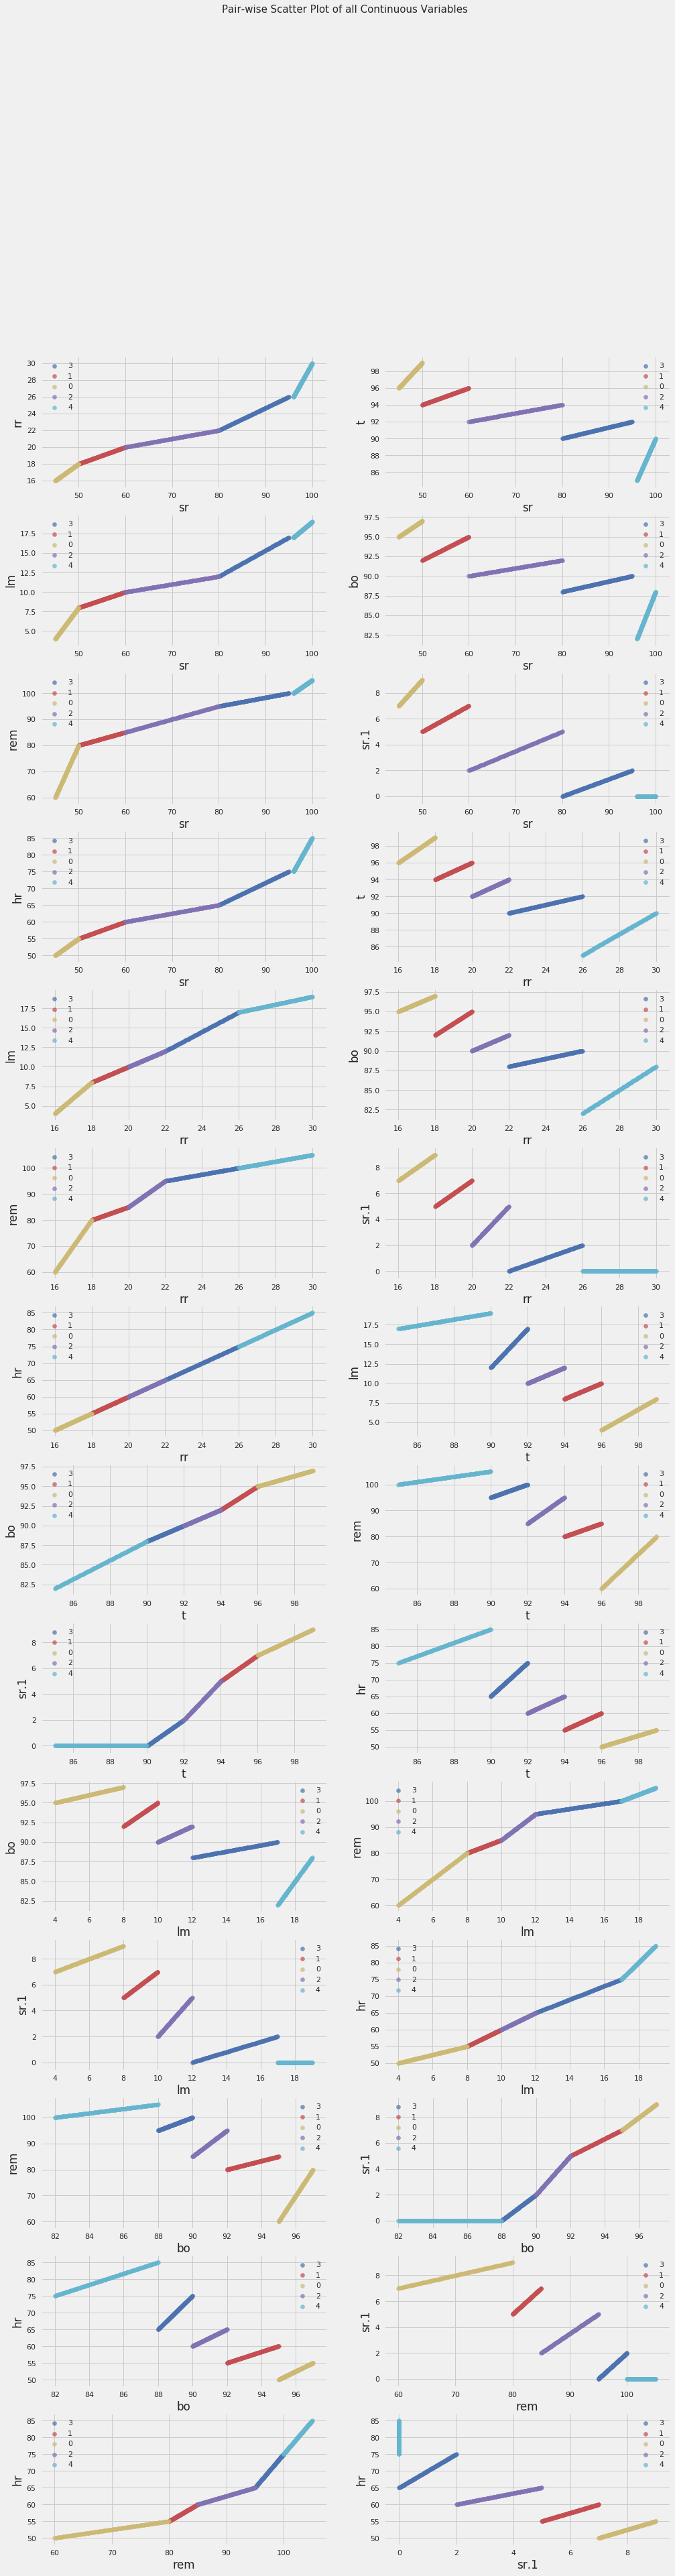

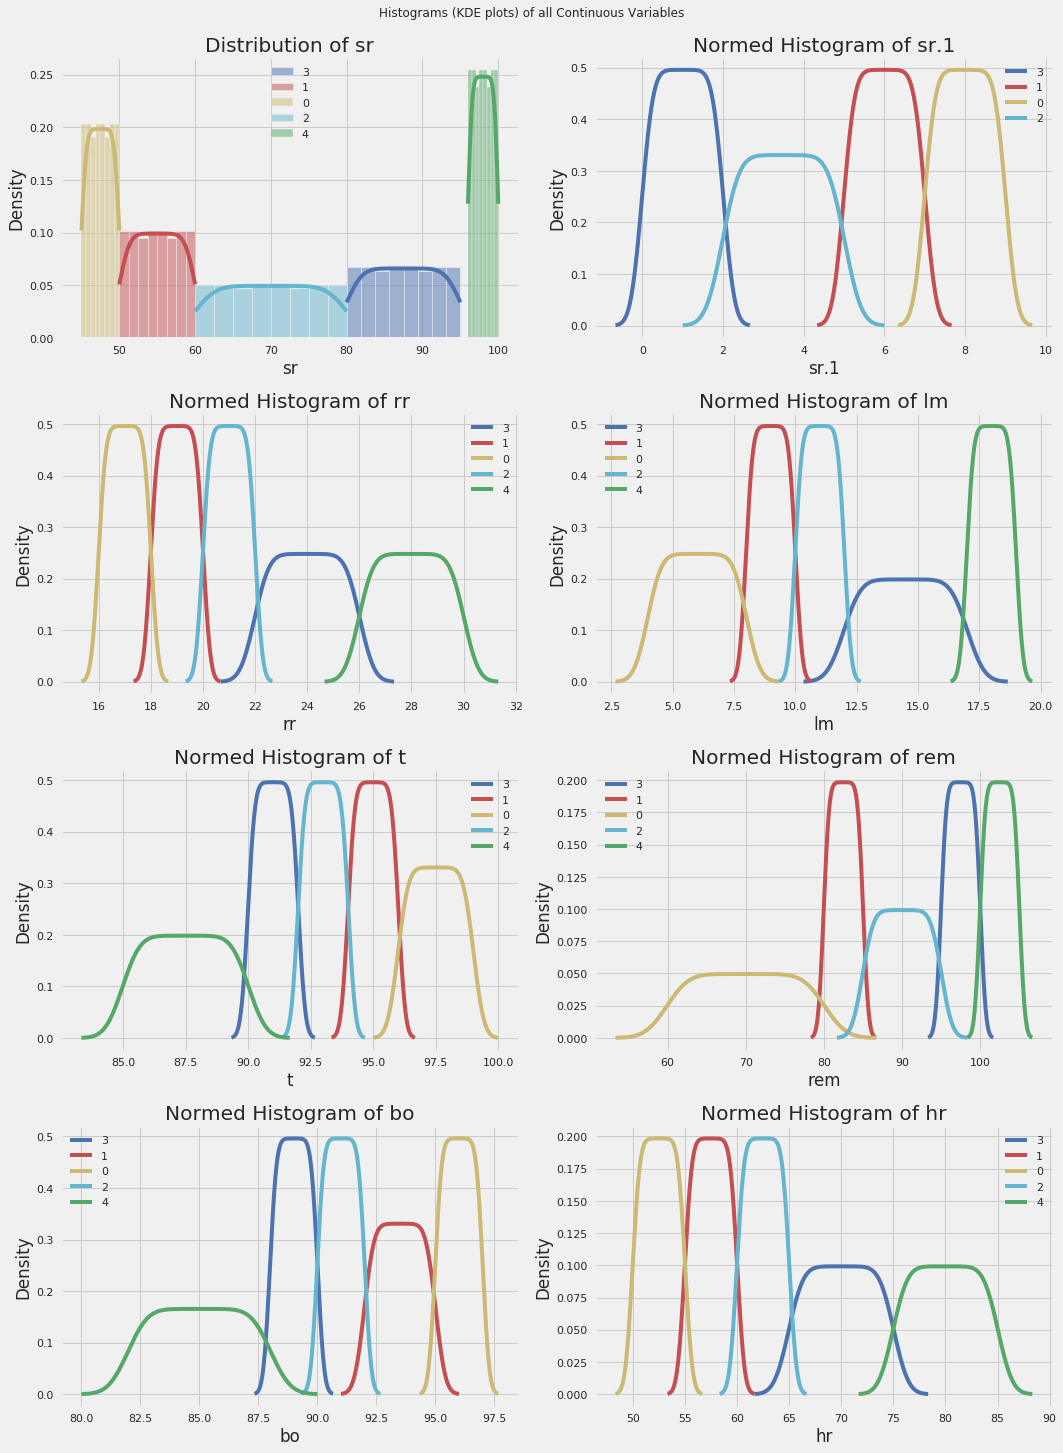

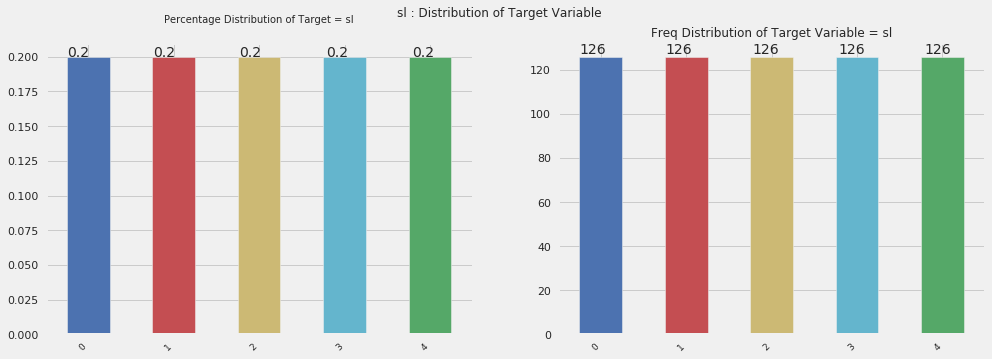

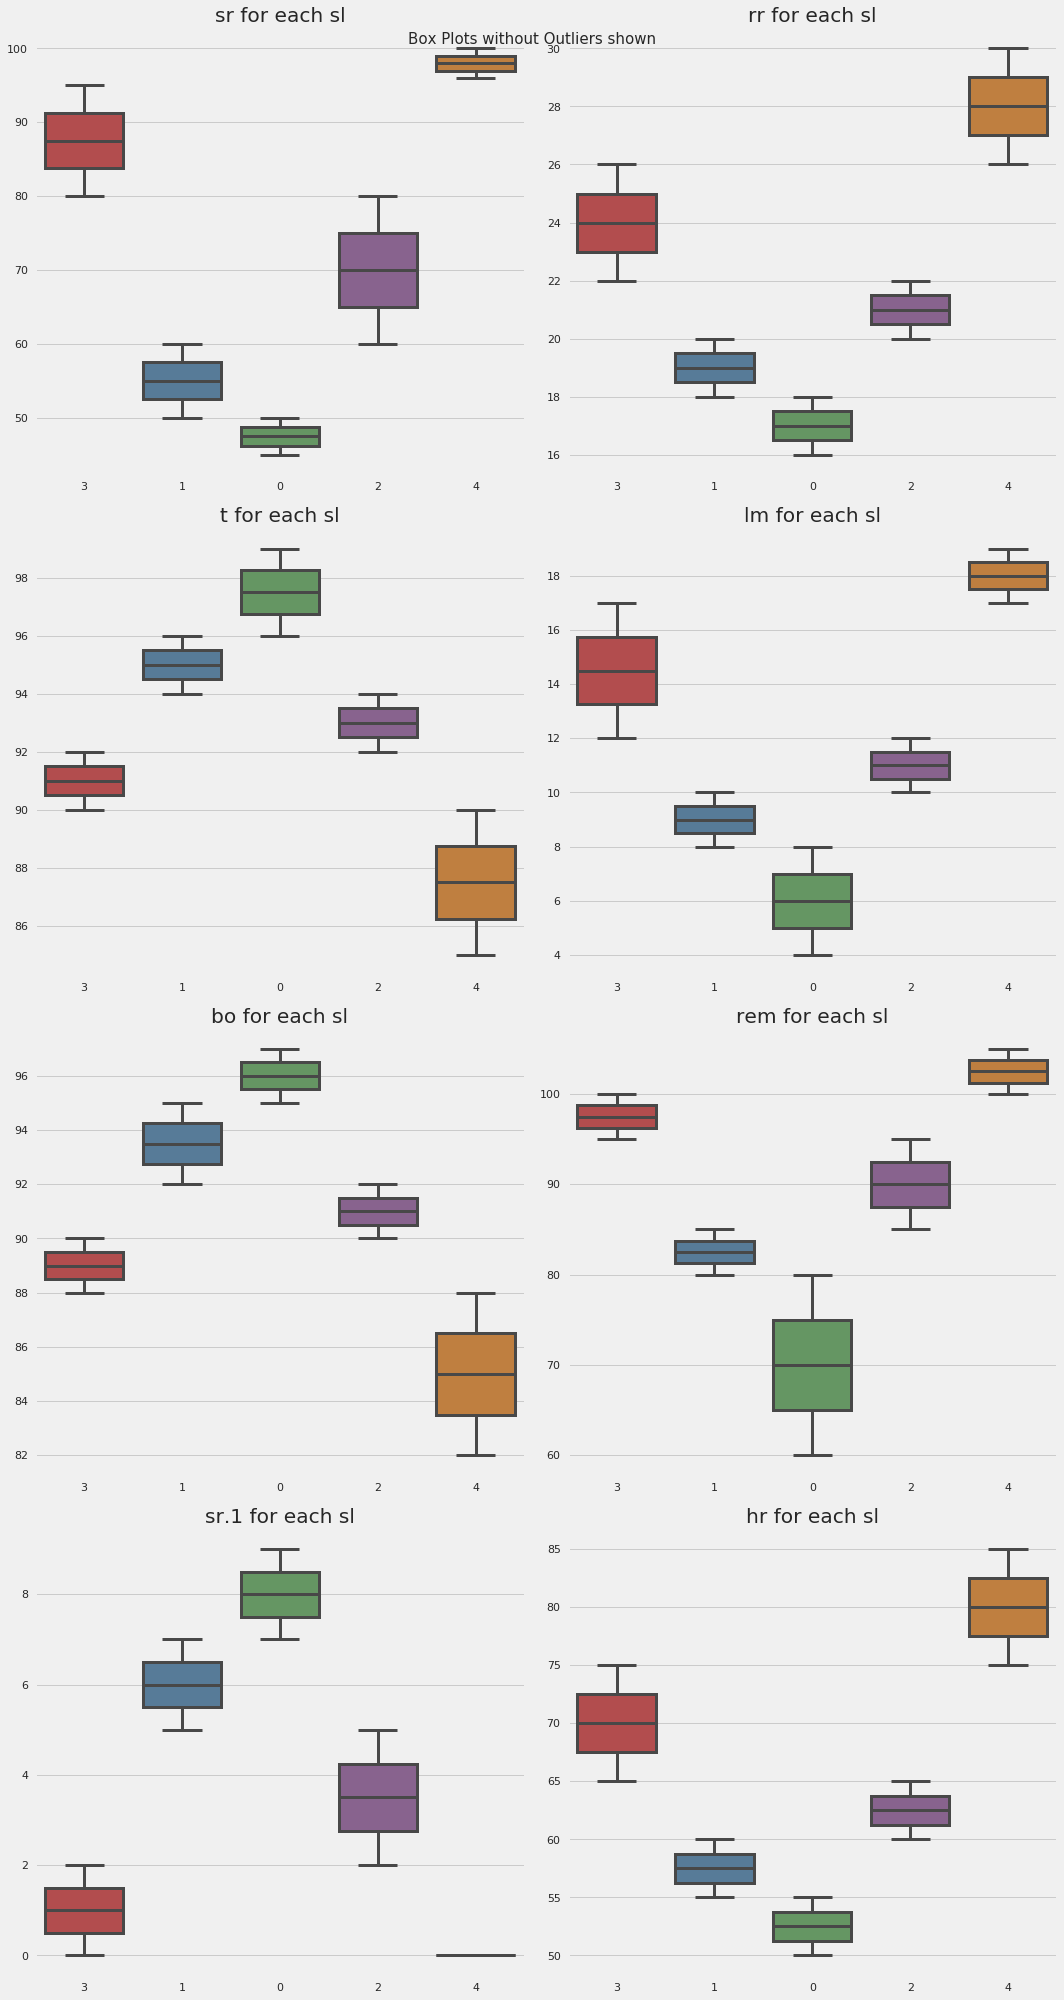

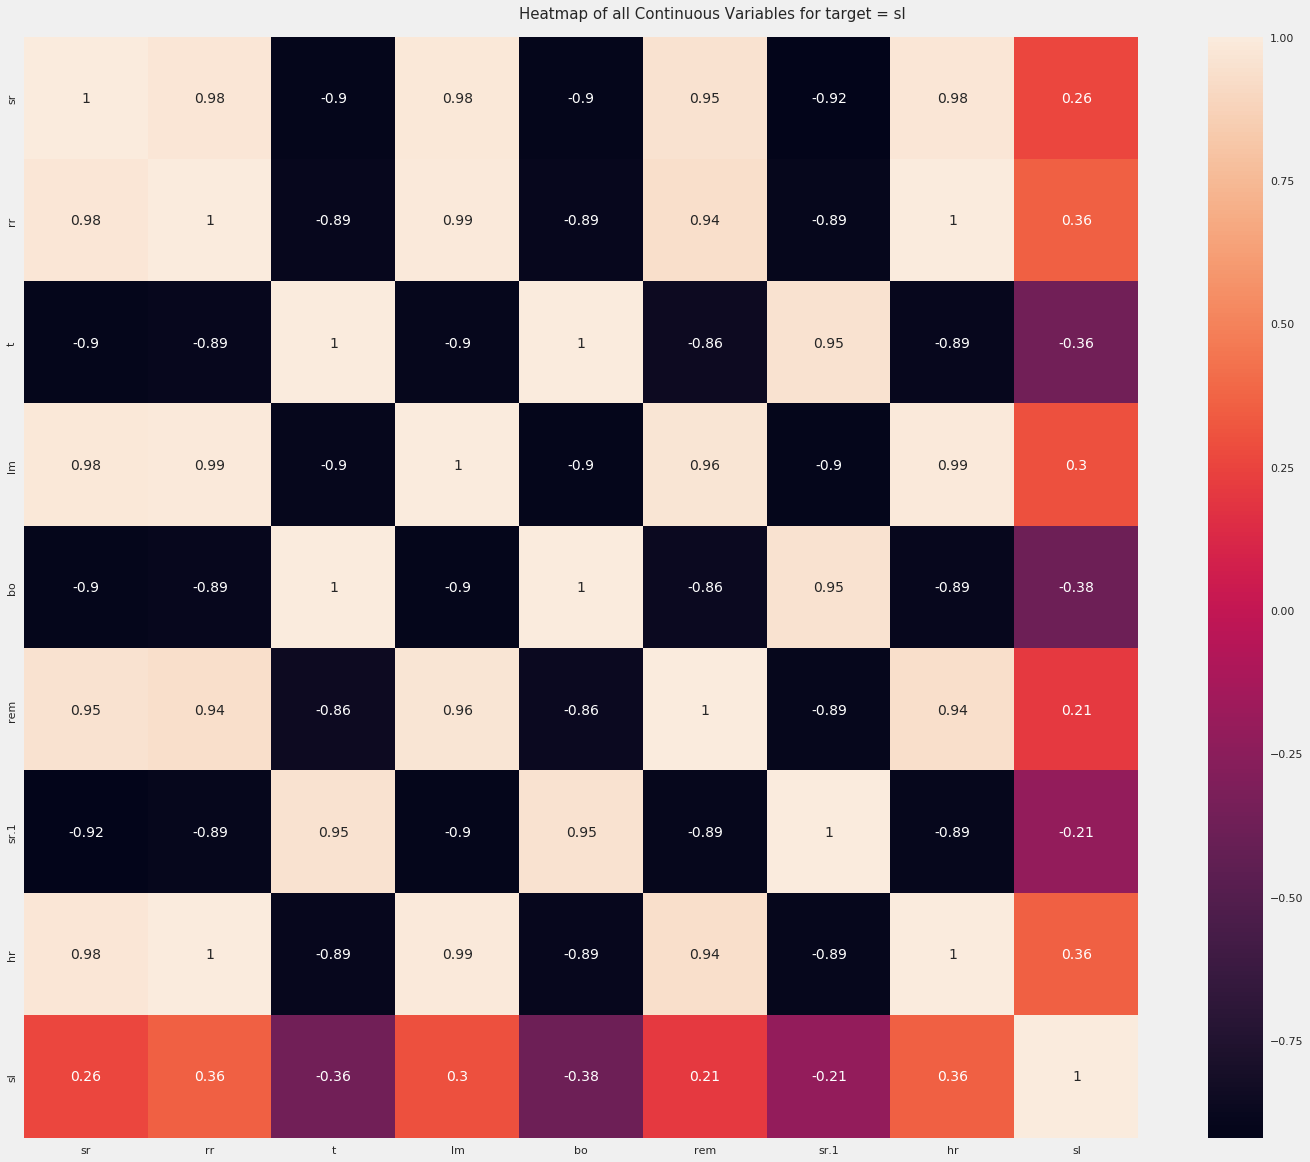

In [ ]:
dftc = AV.AutoViz('/content/dataset.csv',verbose=1,depVar='sl')

# Modeling 
In this case. since, it is a tabular data usage of the ML would suit the pipeline


In [ ]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import confusion_matrix , classification_report

In [ ]:
x = dataset.copy().drop('sl',axis=1).to_numpy()
y = dataset.copy()['sl'].to_numpy()

NameError: ignored

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(x,y,train_size=0.8,test_size=0.2)

In [ ]:
model = tree.DecisionTreeClassifier()
model = model.fit(x_train,y_train)

[Text(0.6666666666666666, 0.9, 'sr <= 95.5\ngini = 0.8\nsamples = 504\nvalue = [100, 101, 101, 97, 105]'),
 Text(0.5, 0.7, 'sr1 <= 7.008\ngini = 0.75\nsamples = 399\nvalue = [100, 101, 101, 97, 0]'),
 Text(0.3333333333333333, 0.5, 'lm <= 10.008\ngini = 0.667\nsamples = 299\nvalue = [0, 101, 101, 97, 0]'),
 Text(0.16666666666666666, 0.3, 'gini = 0.0\nsamples = 101\nvalue = [0, 101, 0, 0, 0]'),
 Text(0.5, 0.3, 'bo <= 90.008\ngini = 0.5\nsamples = 198\nvalue = [0, 0, 101, 97, 0]'),
 Text(0.3333333333333333, 0.1, 'gini = 0.0\nsamples = 97\nvalue = [0, 0, 0, 97, 0]'),
 Text(0.6666666666666666, 0.1, 'gini = 0.0\nsamples = 101\nvalue = [0, 0, 101, 0, 0]'),
 Text(0.6666666666666666, 0.5, 'gini = 0.0\nsamples = 100\nvalue = [100, 0, 0, 0, 0]'),
 Text(0.8333333333333334, 0.7, 'gini = 0.0\nsamples = 105\nvalue = [0, 0, 0, 0, 105]')]

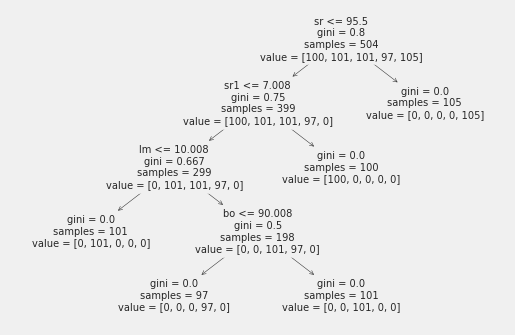

In [ ]:
tree.plot_tree(model,feature_names=['sr','rr','t','lm','bo','rem','sr1','hr'])

In [ ]:
preds = model.predict(x_test)

In [ ]:
conf_metrics = confusion_matrix(y_test,preds)

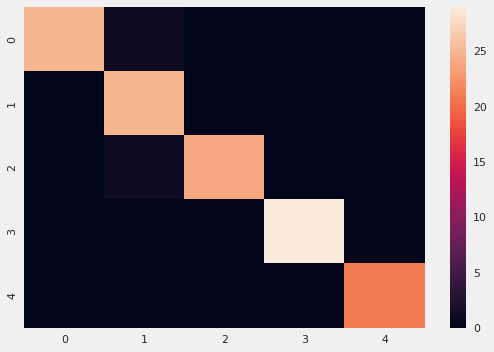

In [ ]:
sns.heatmap(conf_metrics)

In [ ]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        26
           1       0.93      1.00      0.96        25
           2       1.00      0.96      0.98        25
           3       1.00      1.00      1.00        29
           4       1.00      1.00      1.00        21

    accuracy                           0.98       126
   macro avg       0.99      0.98      0.98       126
weighted avg       0.99      0.98      0.98       126



In [ ]:
import joblib
joblib.dump(model,"model.joblib")

['model.joblib']

In [ ]:
loaded_model = joblib.load("model.joblib")

In [ ]:
loaded_model.predict(np.zeros((22,8)))

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])